In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [28]:
print(tf.__version__)

2.9.2


In [29]:
fashion_mnist = keras.datasets.fashion_mnist

In [30]:
(images_train, labels_train), (images_test, labels_test) = fashion_mnist.load_data()

In [31]:
images_train.shape

(60000, 28, 28)

In [32]:
labels_train.shape

(60000,)

In [33]:
images_test.shape

(10000, 28, 28)

In [34]:
labels_test.shape

(10000,)

In [43]:
class_names = ['T-Shirt', 'Pants', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [44]:
labels_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

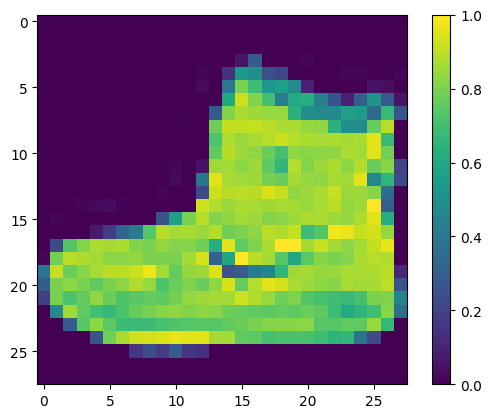

In [45]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

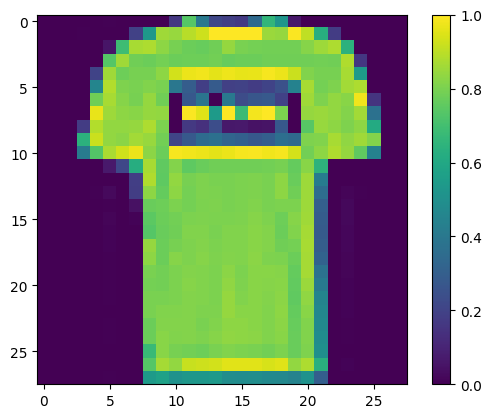

In [46]:
plt.figure()
plt.imshow(images_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [47]:
images_train = images_train / 255.0
images_test = images_test / 255.0
# converted 0-255 to 0-1 (see new image)

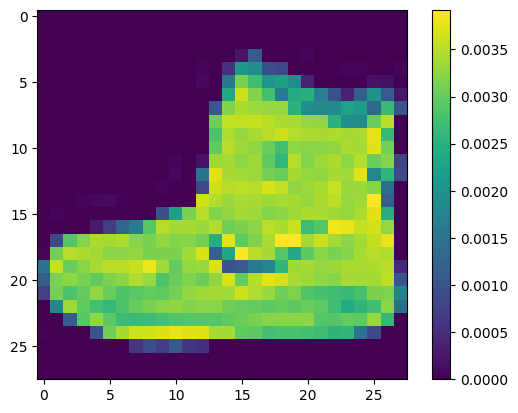

In [48]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

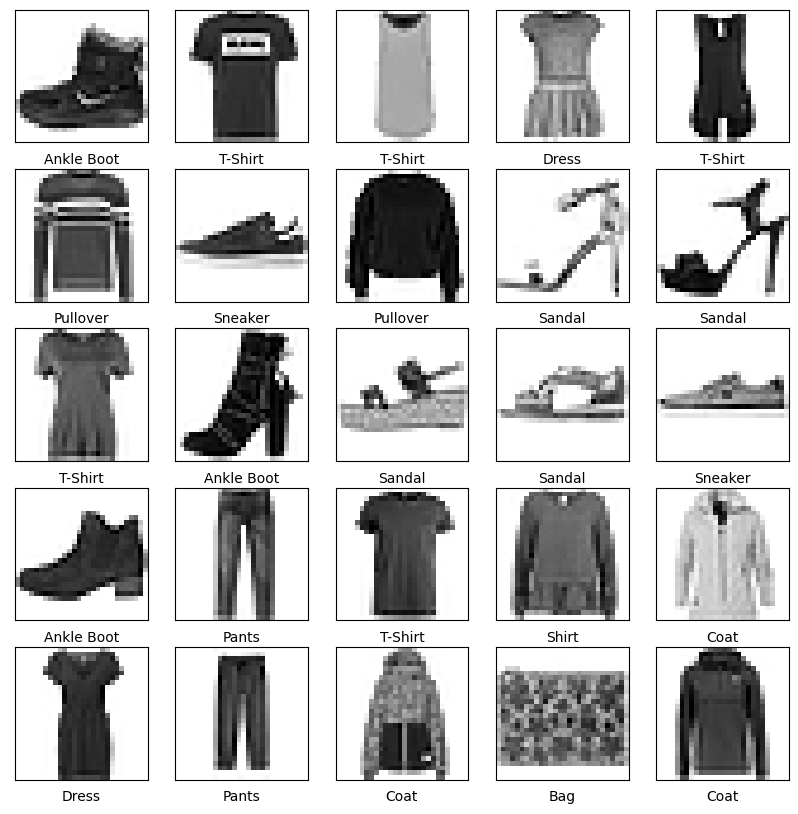

In [49]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels_train[i]])
plt.show()

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

Metal device set to: Apple M1


2022-09-05 18:06:01.631942: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-05 18:06:01.632129: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [50]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [51]:
model.fit(images_train, labels_train, epochs = 5)

Epoch 1/5


2022-09-05 18:13:53.385790: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-05 18:13:53.518212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 1.0992 - accuracy: 0.6682
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6453 - accuracy: 0.7685
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5703 - accuracy: 0.7967
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5283 - accuracy: 0.8134
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5004 - accuracy: 0.8232


In [52]:
test_loss, test_acc = model.evaluate(images_test, labels_test)
print('Accuracy: ', test_acc)

 45/313 [===>..........................] - ETA: 0s - loss: 0.4887 - accuracy: 0.8264

2022-09-05 18:15:30.785149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.5184 - accuracy: 0.8116
Accuracy:  0.8116000294685364


In [53]:
predictions = model.predict(images_test)

110/313 [=========>....................] - ETA: 0s

2022-09-05 18:17:06.690939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


In [54]:
predictions[0]

array([2.61965943e-06, 2.33723352e-08, 6.90412298e-06, 1.88907816e-05,
       1.72850832e-05, 1.04022615e-01, 1.93644155e-05, 3.51918221e-01,
       5.38287405e-03, 5.38611293e-01], dtype=float32)

In [55]:
np.argmax(predictions[0])

9

In [56]:
labels_test[0]

9

In [93]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f'{class_names[predicted_label]} {round(100*np.max(predictions_array))}% {class_names[true_label]}', color=color)

In [94]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    plot[predicted_label].set_color('red')
    plot[true_label].set_color('green')

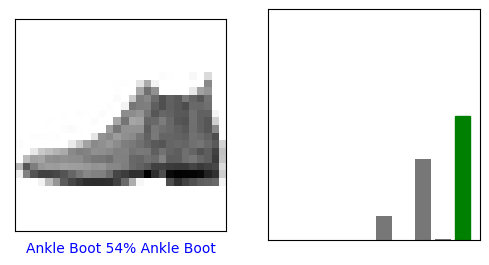

In [95]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, labels_test, images_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, labels_test)
plt.show()

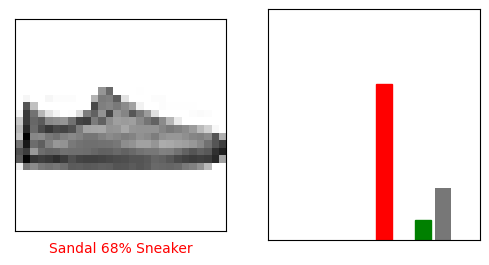

In [96]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, labels_test, images_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, labels_test)
plt.show()

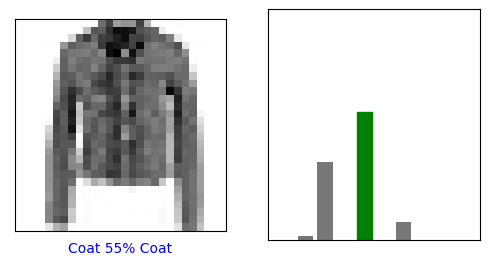

In [97]:
i = 10
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, labels_test, images_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, labels_test)
plt.show()

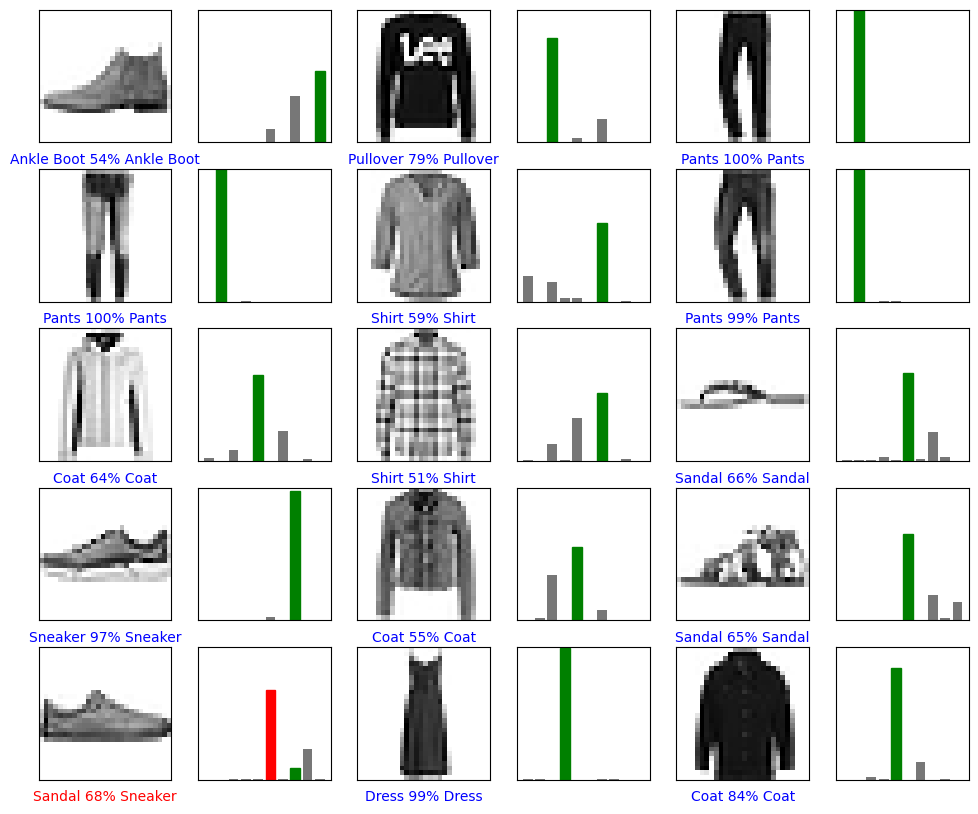

In [98]:
rows = 5 
cols = 3
num_images = rows * cols
plt.figure(figsize=(2*2*cols, 2*rows))
for i in range(num_images):
    plt.subplot(rows, 2*cols, 2*i+1)
    plot_image(i, predictions, labels_test, images_test)
    plt.subplot(rows, 2*cols, 2*i+2)
    plot_value_array(i, predictions, labels_test)
plt.show()